In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import paths

In [10]:
image1 = cv2.imread('C:/ariadh/python/idb/Objects/butterfly/butterfly_image_(22).jpg')

In [11]:
image2 = cv2.imread('C:/ariadh/python/idb/Objects/butterfly/butterfly_image_(26).jpg')

In [12]:
image3 = cv2.imread('C:/ariadh/python/idb/Objects/butterfly/butterfly_image_(87).jpg')

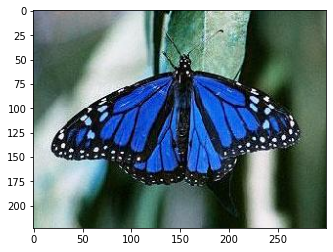

In [13]:
plt.imshow(image1)

In [14]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

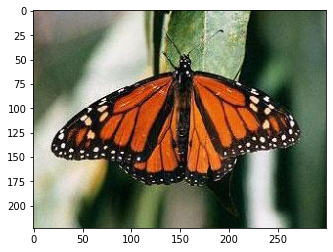

In [15]:
plt.imshow(image1)

In [16]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [17]:
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

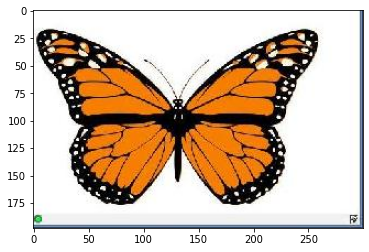

In [18]:
plt.imshow(image2)

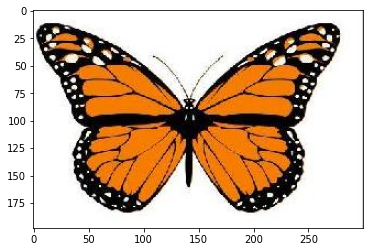

In [19]:
plt.imshow(image3)

In [20]:
imutils.is_cv2()

False

In [21]:
class RGBHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        hist = cv2.calcHist([image], [0, 1, 2],None, self.bins, [0, 256, 0, 256, 0, 256])
       # hist = cv2.normalize(hist)
        hist = cv2.normalize(hist, hist)
 
        # return out 3D histogram as a flattened array
        return hist.flatten()

In [22]:
class HSVHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        hist = cv2.calcHist([image], [0, 1, 2],None, self.bins, [0, 256, 0, 256, 0, 256])
       # hist = cv2.normalize(hist)
        hist = cv2.normalize(hist, hist)
 
        # return out 3D histogram as a flattened array
        return hist.flatten()

In [23]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
	# return the chi-squared distance
	return d

In [24]:
descRGB = RGBHistogram([8, 8, 8])

In [25]:
descHSV = HSVHistogram([8, 8, 8])

In [26]:
features1RGB = descRGB.describe(image1)

In [27]:
features2RGB = descRGB.describe(image2)

In [28]:
features3RGB = descRGB.describe(image3)

In [29]:
d = chi2_distance(features1RGB, features2RGB)
d

2.190228954224823

In [30]:
d = chi2_distance(features2RGB, features3RGB)
d

0.03994699779593527

In [31]:
d = chi2_distance(features1RGB, features3RGB)
d

2.1107782173310277

In [32]:
features1HSV = descHSV.describe(image1)

In [33]:
features2HSV = descHSV.describe(image2)

In [34]:
features3HSV = descHSV.describe(image3)

In [35]:
d = chi2_distance(features1HSV, features2HSV)
d

3.115264703733058

In [36]:
d = chi2_distance(features2HSV, features3HSV)
d

0.05081167081740157

In [37]:
d = chi2_distance(features1HSV, features3HSV)
d

3.057359427128588

In [39]:
imagePaths = list(paths.list_images('C:/ariadh/python/idb/Objects/butterfly/'))

In [40]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [41]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = cv2.imread(imagePath)
    imagedb = cv2.cvtColor(imagedb, cv2.COLOR_BGR2RGB)
    featuresHSVdb = descHSV.describe(imagedb)
    d=chi2_distance(featuresHSVdb, features1HSV)
    dlist.append((d,imagePath))
    

[INFO] processing image 1/91
[INFO] processing image 2/91
[INFO] processing image 3/91
[INFO] processing image 4/91
[INFO] processing image 5/91
[INFO] processing image 6/91
[INFO] processing image 7/91
[INFO] processing image 8/91
[INFO] processing image 9/91
[INFO] processing image 10/91
[INFO] processing image 11/91
[INFO] processing image 12/91
[INFO] processing image 13/91
[INFO] processing image 14/91
[INFO] processing image 15/91
[INFO] processing image 16/91
[INFO] processing image 17/91
[INFO] processing image 18/91
[INFO] processing image 19/91
[INFO] processing image 20/91
[INFO] processing image 21/91
[INFO] processing image 22/91
[INFO] processing image 23/91
[INFO] processing image 24/91
[INFO] processing image 25/91
[INFO] processing image 26/91
[INFO] processing image 27/91
[INFO] processing image 28/91
[INFO] processing image 29/91
[INFO] processing image 30/91
[INFO] processing image 31/91
[INFO] processing image 32/91
[INFO] processing image 33/91
[INFO] processing i

In [42]:
dlist.sort(key=lambda x: x[0])

In [43]:
dresult=[]
for i in range(0,8):
    dresult.append(dlist[i][0])

In [44]:
imresult=[]
for i in range(0,8):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

C:\Users\RTEBOU~1\AppData\Local\Temp/ipykernel_14140/2929108600.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)


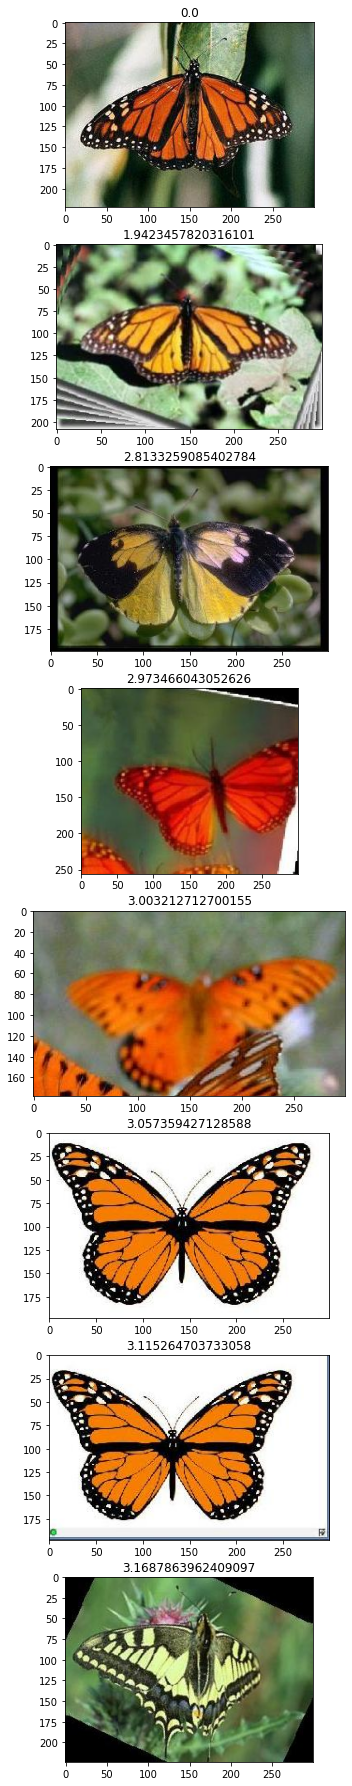

In [45]:
show_images(imresult,8,dresult)